# Linguistics and Data Science [hw08] [hw08adv]

+ Release date: 2023-10-19 
+ Due date: 2023-10-23 1:00 PM

## 주의사항

1. 이 과제를 수행하는 환경에는 `wordcloud` 모듈 및 NanumGothicCoding 폰트가 이미 설치되어 있다고 가정한다. 설치되지 않은 경우 11강 실습 코드를 참고하여 직접 설치하라.
2. 이 ipynb 파일을 자신의 LDS2023 레포지토리의 hw/hw08 폴더에 복사한 후 과제를 수행하라.

## 0. NSMC 키워드 카운터 준비

앞서 [11강 실습 코드](https://github.com/suparklingmin/LingDataSci2023/blob/main/notes/11-20231016-wordcloud-nsmc.ipynb)에서는 우선 NSMC 영화평을 긍정적인 부분집합과 부정적인 부분집합으로 분할했다.

그리고 각 부분집합에서 키워드를 추출하여 출현 빈도를 `collections.Counter` 자료형의 객체로 저장했다.

이 카운터를 사용할 때마다 매번 새로 만든다면 시간이 많이 걸리므로, 피클 파일로 저장해 놓은 것을 가져다 쓰자.

현재 작업 폴더(working directory)는 `LDS2023` 레포지토리의 `hw/hw08/` 이다.

In [1]:
!wget https://github.com/suparklingmin/LingDataSci2023/raw/main/data/nsmc-counters.pkl -O ../../data/nsmc-counters.pkl

--2023-10-19 08:56:17--  https://github.com/suparklingmin/LingDataSci2023/raw/main/data/nsmc-counters.pkl
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/suparklingmin/LingDataSci2023/main/data/nsmc-counters.pkl [following]
--2023-10-19 08:56:18--  https://raw.githubusercontent.com/suparklingmin/LingDataSci2023/main/data/nsmc-counters.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 792522 (774K) [application/octet-stream]
Saving to: ‘../../data/nsmc-counters.pkl’

../../data/nsmc-cou 100%[===================>] 773.95K  --.-KB/s    in 0.008s  

2023-10-19 08:56:18 (89.1 MB/s) - ‘../../dat

Python `pickle` 모듈에서 피클 파일을 열고(`open()`) 파일에 저장된 객체를 가져와서(`pickle.load()`) `counts`라는 변수명에 할당한다.

In [2]:
import pickle
with open('../../data/nsmc-counters.pkl', 'rb') as f:
    counts = pickle.load(f)

`counts` 객체는 11강 실습 코드의 결과로 만들어진 카운터(의 딕셔너리)와 내용이 같다.

즉, `0`(negative)와 `1`(positive)을 key로 가지고, 각각의 key에 해당하는 value로 카운터 자료형을 가진다.

먼저 부정적인 영화평에서 가장 자주 사용된 키워드 10개의 목록을 출력해 보자.

In [3]:
print(counts[0].most_common(10))

[('영화', 32943), ('점', 6175), ('진짜', 5819), ('이', 5551), ('평점', 4936), ('스토리', 4548), ('왜', 4458), ('쓰레기', 4380), ('정말', 4366), ('것', 4251)]


다음으로 긍정적인 영화평에서 가장 자주 사용된 키워드 10개의 목록을 출력해 보자.

In [4]:
print(counts[1].most_common(10))

[('영화', 35096), ('정말', 8477), ('최고', 7448), ('진짜', 5460), ('이', 5181), ('감동', 5154), ('연기', 4937), ('생각', 4491), ('점', 4401), ('것', 4205)]


## 1. 단어구름 그리기

우리는 [숙제05] 및 11강 실습 코드에서 이미 단어구름(word cloud)을 그려본 적이 있다.

기본적으로는 `wordcloud` 모듈을 설치하고 `WordCloud` 객체를 초기화한 뒤, `generate_from_frequencies(Counter)` 메소드로 그림을 생성하면 된다.

이 과정은 11강 실습 코드에서 이미 `plot(Counter)` 함수로 정의해 보았다.



In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

palettes = ['spring', 'summer']
font = 'NanumGothicCoding' # 한글 출력이 가능함.

def plot(counts):
  for label in counts.keys():
    plt.subplot(1, len(counts), label+1) # 작은 그림: (1, 2) 모양의 그림
    wc = WordCloud(font_path=font, width=600, height=600, colormap=palettes[label])
    gen = wc.generate_from_frequencies(counts[label]) # 인자: Counter
    plt.imshow(gen) # 작은 그림

  plt.show() # 큰 그림 출력

기존의 카운터로 단어구름을 일단 그려 보자.

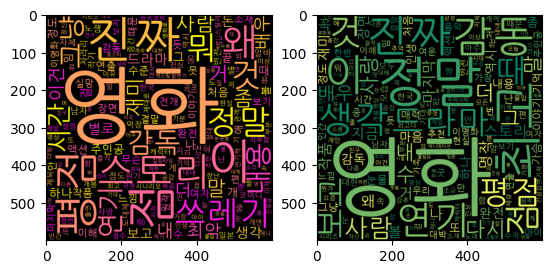

In [6]:
plot(counts)

# 2. 단어구름 개선하기 (필수, 5점)

### 기존 카운터로 그린 단어구름의 문제점과 해결책

방금 그린 단어구름에서는 왼쪽의 부정적인 영화평과 오른쪽의 긍정적인 영화평에서 공통적으로 많이 나타나는 단어를 찾을 수 있다.

위에서 출력해 본 상위 10개 단어만 하더라도 영화, 점, 진짜, 정말, 이, 것 6개가 겹쳤다.

이렇게 겹치는 단어가 많으면, 부정적인 영화평과 긍정적인 영화평 사이의 차이를 명확하게 살펴보기 어렵다.

이 문제를 해결하기 위해 아래 셀에서 새로운 카운터 `counts_exclusive`를 만들라.

In [37]:
from copy import deepcopy
from collections import Counter
# counts_exclusive = counts # NEVER DO THIS
#counts_exclusive = counts.copy() # DON'T DO THIS, AT LEAST FOR THIS HOMEWORK
counts_exclusive = deepcopy(counts) # DO THIS

stopwords =  ["영화", "정말", "진짜", "점", "이", "것", "스토리", "연기", "평점", "사람"]
def filter_stopwords(counts, stop_words):
    filtered_counts = {}
    for label in counts.keys():
        label_words = counts[label]
        filtered_label_words = {word: count for word, count in label_words.items() if word not in stop_words}
        filtered_counts[label] = filtered_label_words
    return filtered_counts
counts_exclusive = filter_stopwords(counts_exclusive, stopwords)

counts_exclusive[0] = Counter(counts_exclusive[0])
counts_exclusive[1] = Counter(counts_exclusive[1])


이제 새로 만든 카운터에서 부정적인 영화평의 상위 10개 단어를 뽑아 보자.

단, 출력 결과가 예시와 꼭 일치할 필요는 없다.

In [38]:
# Run this cell again
print(counts_exclusive[0].most_common(10))

[('왜', 4458), ('쓰레기', 4380), ('뭐', 4083), ('감독', 3764), ('그냥', 3756), ('내용', 3656), ('시간', 3352), ('거', 3250), ('재미', 3222), ('말', 3178)]


다음으로 긍정적인 영화평의 상위 10개 단어를 뽑아 보자. 두 목록이 서로 겹치지 않는다면 잘 된 것이다.

In [39]:
# Run this cell again
print(counts_exclusive[1].most_common(10))

[('최고', 7448), ('감동', 5154), ('생각', 4491), ('드라마', 4034), ('때', 3821), ('보고', 3610), ('다시', 3192), ('사랑', 3176), ('더', 3081), ('그', 2962)]


새로 만든 카운터로 단어구름을 그렸을 때 두 부분집합의 차이가 한눈에 드러나면 된다.

그림이 예시와 꼭 일치할 필요는 없다.


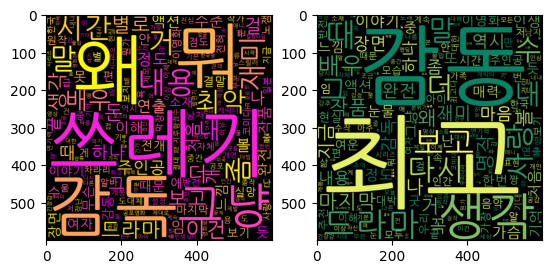

In [41]:
# Run this cell again
plot(counts_exclusive)

## 3. [hw08adv] 보너스 문제 (선택, +1점)

이 문제는 필수적으로 답할 필요는 없다.

앞서 `counts_exclusive`를 설정할 때 `counts`의 값을 받아오기 위해 `copy.deepcopy()` 함수를 사용했다.

```
from copy import deepcopy
# counts_exclusive = counts # NEVER DO THIS
# counts_exclusive = counts.copy() # DON'T DO THIS, AT LEAST FOR THIS HOMEWORK
counts_exclusive = deepcopy(counts) # DO THIS
```

이 과제에서 `counts`의 값을 복사할 때 단순 할당문이나 `dict.copy()` 메소드를 쓰면 안 되는 이유를 아래 셀에서 설명하라.

답: 'counts_exclusive = counts'와 같이 단순할당문을 사용하면 counts 딕셔너리에 대한 새로운 reference를 만드는 것입니다. 이 것은 counts와 counts_exclusive가 메모리 안에서는 같은 dictionary에 대해 생성되어 있다는 뜻이고, 어느 한쪽을 수정하면 다른 한쪽에도 같은 효과를 끼친다는 뜻입니다. 단어구름 개선할때는 필터링을 사용해야 하기 떄문에 서로 종속되는 관계에 있는 객체를 사용하는 것은 바람직하지 않습니다.

dict.copy()를 쓰면 안 되는 이유는, counts가 담고있는 Counter 객체가 파이썬에서 중첩자료구조로 인식되기 떄문입니다. dict.copy는 shallow copy(얕은 복사본)을 생성하는데, 얕은 복사본에서는 Counter객체와 같이 중첩자료구조를 가지고 있는 객체가 원래의 딕셔너리의 객체, 즉 여기서는 counts 안에 있는 Counter객체와 여전히 같은 레퍼런스를 지니고 있기 떄문에 단순할당문의 경우와 비슷하게 dict.copy로 만든 복사본에서 수정을 하면, counts도 같이 수정되기 떄문입니다. 

그러므로 .deepcopy()를 사용해서 종속관계가 아예 없는 복사본을 만들어 사용하는 것이 바람직합니다.